In [1]:
import pygame
import numpy as np
from copy import deepcopy

WIDTH = 500  # width of our game window
HEIGHT = 500 # height of our game window
FPS = 30 # frames per second

BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

H_STEP = 0.05
DAMPING = 0.05
R_DAMPING = 0.1

V_MAX = 20
VR_MAX = 5

pygame 2.0.1 (SDL 2.0.14, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class Player(pygame.sprite.Sprite):
    def __init__(self):
        pygame.sprite.Sprite.__init__(self)
        self.image = pygame.Surface((50, 50))
#         self.image.fill(GREEN)
        self.image.set_colorkey(BLACK)
    
        pygame.draw.circle(self.image, WHITE, [25, 25], 20)
        pygame.draw.circle(self.image, RED, [15, 12], 8)
        pygame.draw.circle(self.image, RED, [35, 12], 8)
        pygame.draw.line(self.image, GREEN, [25, 25], [25, 0], 5)
        self.image = self.rotate(self.image, self.image.get_rect(), -90)[0]
        
        self.image_og = self.image.copy()
        
        self.rect = self.image.get_rect()
        self.rect.center = (WIDTH / 2, HEIGHT / 2)
        
        self.posx = deepcopy(self.rect.x)
        self.posy = deepcopy(self.rect.y)
        
        self.acclin = 0
        self.velx = 0
        self.vely = 0        
#         self.accx = 0
#         self.accy = 0
        
        self.angle = 0
        self.velr = 0
        self.accr = 0
        
#     def control(self, x, y):
#         self.accx = x
#         self.accy = y
        
#     def update(self):
#         self.velx = self.velx + self.accx - DAMPING * self.velx
#         self.vely = self.vely + self.accy - DAMPING * self.vely
#         self.rect.x = np.mod(self.rect.x + self.velx, WIDTH) 
#         self.rect.y = np.mod(self.rect.y + self.vely, HEIGHT)
#         print(self.velx, self.vely)

        
    def rotate(self, image, rect, angle):
        """Rotate the image while keeping its center."""
        # Rotate the original image without modifying it.
        new_image = pygame.transform.rotate(image,angle)
        # Get a new rect with the center of the old rect.
        rect = new_image.get_rect(center=rect.center)
        return new_image, rect
        
    def control(self, x, y):
        self.acclin = y
        self.accr = x

        
    def update(self):
        self.velr = self.velr + H_STEP * self.accr - R_DAMPING * self.velr
        self.velr = np.sign(self.velr) * np.min([np.abs(self.velr), VR_MAX])
        self.angle = np.mod(self.angle + self.velr, 360)
        
        self.image, self.rect = self.rotate(self.image_og, self.rect, -self.angle)
        
        wind_accx = 5.
        wind_accy = 0.
        self.accx = (np.cos(self.angle / 180 * np.pi) * self.acclin + wind_accx) * H_STEP
        self.accy = (np.sin(self.angle / 180 * np.pi) * self.acclin + wind_accy) * H_STEP
        self.velx = self.velx + self.accx - DAMPING * self.velx
        self.vely = self.vely + self.accy - DAMPING * self.vely
        
#         v_mag = np.sqrt(self.velx ** 2 + self.vely ** 2)
#         if v_mag > V_MAX:
#             self.velx = self.velx / v_mag * V_MAX
#             self.vely = self.vely / v_mag * V_MAX
#         if v_mag < 0.1:
#             self.velx = 0
#             self.vely = 0
        
        self.posx = np.mod(self.posx + self.velx, WIDTH) 
        self.posy = np.mod(self.posy + self.vely, HEIGHT)
        self.rect.x = int(self.posx)
        self.rect.y = int(self.posy)
#         self.rect = self.rect.move(int(self.velx) + wind_velx, int(self.vely) + wind_vely)
#         self.rect.x = self.rect.x % WIDTH
#         self.rect.y = self.rect.y % HEIGHT
    
#         print(self.angle, self.velx, self.vely)
#         print(self.angle)
        
            
    
        
all_sprites = pygame.sprite.Group()
player = Player()
all_sprites.add(player)
steps = 1
step_r = 1
 

In [3]:
# activate the pygame library .  
# initiate pygame and give permission  
# to use pygame's functionality.  
pygame.init()
  
# create the display surface object  
# of specific dimension..e(500, 500).  
win = pygame.display.set_mode((WIDTH, HEIGHT))
  
# set the pygame window name 
pygame.display.set_caption("Moving rectangle")
clock = pygame.time.Clock()
  
# object current co-ordinates 
x = 200
y = 200
  
# dimensions of the object 
width = 20
height = 20

  
# velocity / speed of movement
vel = 3
  
# Indicates pygame is running
run = True
  
# infinite loop 
dx = 0
dy = 0

posxs = []
posys = []
while run:
    clock.tick(FPS)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
            
#         if event.type == pygame.KEYDOWN:
#             if event.key == pygame.K_LEFT:
#                 player.control(-steps,0)
#             if event.key == pygame.K_RIGHT:
#                 player.control(steps,0)
#             if event.key == pygame.K_UP:
#                 player.control(0, steps)
#             if event.key == pygame.K_DOWN:
#                 player.control(0, -steps)            
            
        if event.type == pygame.KEYUP:
            if event.key == pygame.K_LEFT:
                dx = 0
            if event.key == pygame.K_RIGHT:
                dx = 0
            if event.key == pygame.K_UP:
                dy = 0
            if event.key == pygame.K_DOWN:
                dy = 0
            
            player.control(dx, dy)
    
    keys = pygame.key.get_pressed()

    if keys[pygame.K_RIGHT]:
        dx = dx + step_r
    if keys[pygame.K_LEFT]:
        dx = dx - step_r
    if keys[pygame.K_UP]:
        dy = dy + steps
    if keys[pygame.K_DOWN]:
        dy = dy - steps
    player.control(dx, dy)
        
    # completely fill the surface object  
    # with black colour  
    win.fill((0, 0, 0))
    all_sprites.update()
      
    # drawing object on screen which is rectangle here 
    all_sprites.draw(win)
      
    # it refreshes the window
    pygame.display.update() 
    
    posxs.append(player.rect.x)
    posys.append(player.rect.y)
  
# closes the pygame window 
pygame.quit()

(0.0, 500.0)

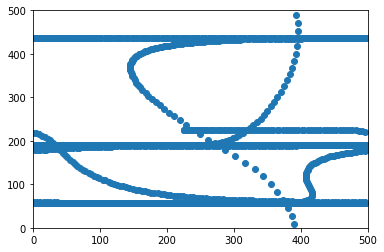

In [4]:
import matplotlib.pyplot as plt
t = len(posxs)
timeslice = slice(0, -1)
plt.scatter(posxs[timeslice], posys[timeslice])
plt.xlim([0, WIDTH])
plt.ylim([0, HEIGHT])